# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [56]:
# Data Analysis and visualization tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import os

#statistics tools
import statsmodels.api as sm
import scipy.stats as st
from scipy import stats
from scipy.stats import shapiro, mannwhitneyu, chi2_contingency

#scikit learn framework
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [57]:
# Load data
data = pd.read_csv(
    r"C:\Users\Ega\Pictures\Dicoding\Membangun Sistem ML\Submission-Membangun-Sistem-ML\Eksperimen_SML_Baiq_Ega_Aulia\Dataset\online_shoppers_intention.csv"
)

data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [58]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [59]:
# description of the data
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [60]:
# Null data checking 
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [61]:
# missing percentage of the data
missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64


### Univariate Analysis with Visualization
- Revenue
- Weekend
- Operating System
- Browser
- Month
- VistorType
- TrafficType
- Region

#### Revenue

In [62]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

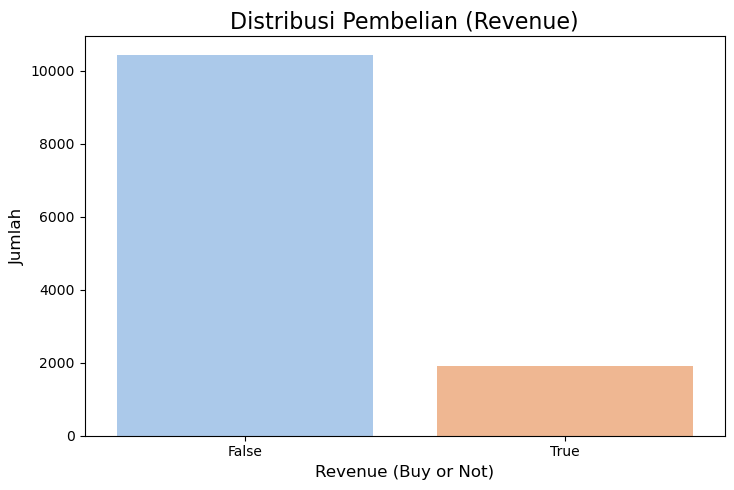

In [63]:
# checking the Distribution of customers on Revenue

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='Revenue', data=data, palette='pastel')
plt.title('Distribusi Pembelian (Revenue)', fontsize=16)
plt.xlabel('Revenue (Buy or Not)', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.tight_layout()
plt.show()

#### Weekend

In [64]:
data['Weekend'].value_counts()

Weekend
False    9462
True     2868
Name: count, dtype: int64

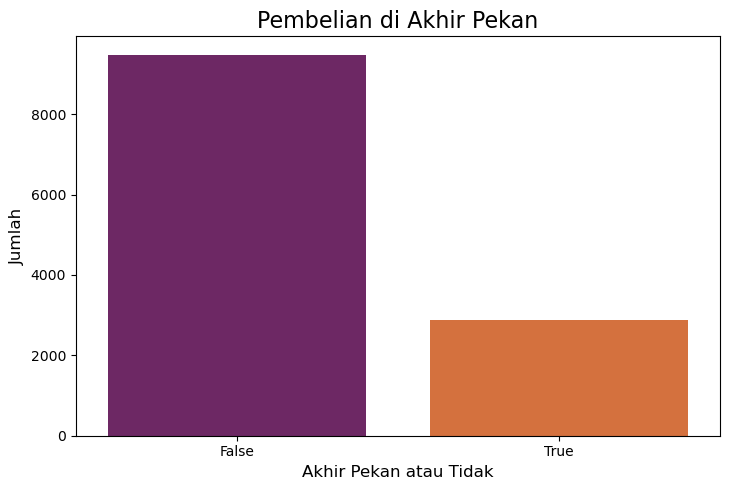

In [65]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 2)
sns.countplot(x='Weekend', data=data, palette='inferno')
plt.title('Pembelian di Akhir Pekan', fontsize=16)
plt.xlabel('Akhir Pekan atau Tidak', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.tight_layout()
plt.show()

#### Operating Systems

In [66]:
# checking the no. of Os's is having
data['OperatingSystems'].value_counts()

OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64

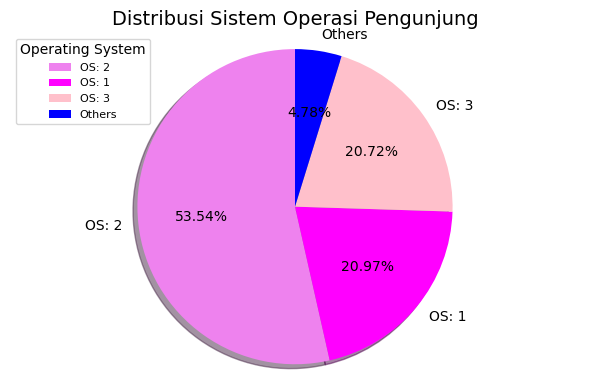

In [67]:
size = [6601, 2585, 2555, 589]
colors = ['violet', 'magenta', 'pink', 'blue']
labels = ["OS: 2", "OS: 1", "OS: 3", "Others"]

plt.figure(figsize=(6, 4))
plt.pie(size, labels=labels, colors=colors, shadow=True, autopct='%.2f%%', startangle=90)
plt.title('Distribusi Sistem Operasi Pengunjung', fontsize=14)
plt.axis('equal')  
plt.legend(title="Operating System", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

#### Browsers

In [68]:
# checking the no. of Browser is having
data['Browser'].value_counts()

Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: count, dtype: int64

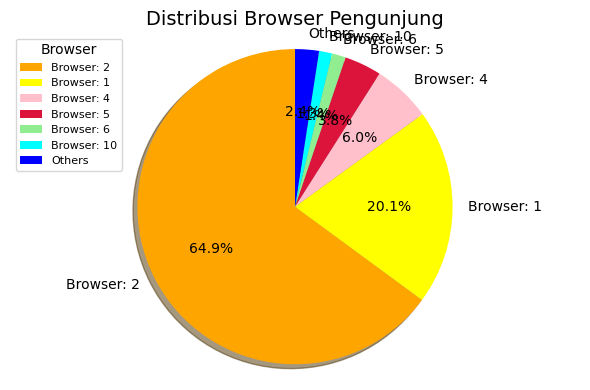

In [69]:
size = [7961, 2462, 736, 467, 174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = ["Browser: 2", "Browser: 1", "Browser: 4", "Browser: 5", "Browser: 6", "Browser: 10", "Others"]

plt.figure(figsize=(6, 4))
plt.pie(
    size, 
    colors=colors, 
    labels=labels, 
    shadow=True, 
    autopct='%.1f%%', 
    startangle=90
)

plt.title('Distribusi Browser Pengunjung', fontsize=14)
plt.axis('equal')  # Agar lingkaran tidak gepeng
plt.legend(title="Browser", loc="best", fontsize=8)
plt.tight_layout()
plt.show()


#### Month

In [70]:
data['Month'].value_counts()

Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64

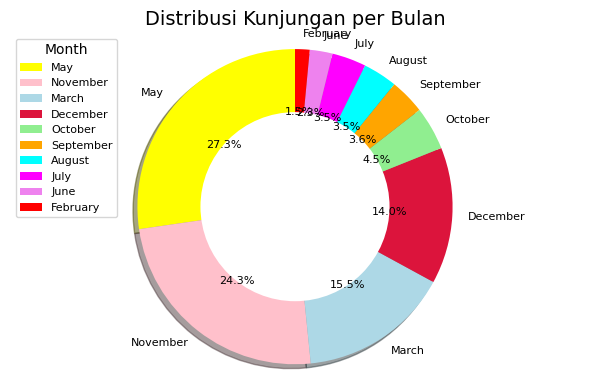

In [71]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'red']
labels = ["May", "November", "March", "December", "October", "September", "August", "July", "June", "February"]

plt.figure(figsize=(6, 4))
wedges, texts, autotexts = plt.pie(
    size, 
    colors=colors, 
    labels=labels, 
    shadow=True, 
    autopct='%.1f%%', 
    startangle=90,
    textprops={'fontsize': 8}
)

centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribusi Kunjungan per Bulan', fontsize=14)
plt.axis('equal')  # Lingkaran sempurna
plt.legend(title="Month", loc="best", fontsize=8)
plt.tight_layout()
plt.show()


#### Visitor Type

In [72]:
data['VisitorType'].value_counts()

VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: count, dtype: int64

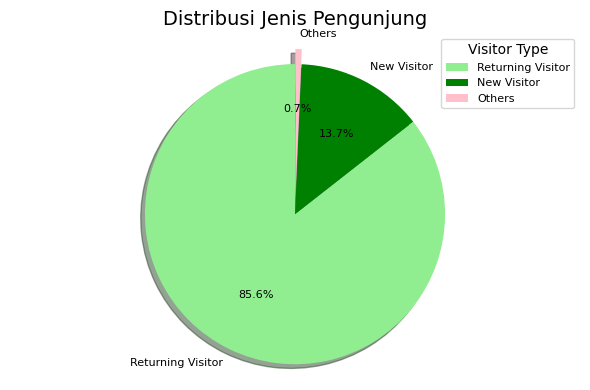

In [73]:
size = [10551, 1694, 85]
colors = ['lightgreen', 'green', 'pink']
labels = ["Returning Visitor", "New Visitor", "Others"]
explode = [0, 0, 0.1]

plt.figure(figsize=(6, 4))

wedges, texts, autotexts = plt.pie(
    size, 
    colors=colors, 
    labels=labels, 
    explode=explode, 
    shadow=True, 
    autopct='%.1f%%',
    startangle=90,
    textprops={'fontsize': 8}
)

plt.title('Distribusi Jenis Pengunjung', fontsize=14)
plt.axis('equal')  # Agar proporsi lingkaran pas
plt.legend(title="Visitor Type", loc="best", fontsize=8)
plt.tight_layout()
plt.show()


#### Traffic Type

In [74]:
data['TrafficType'].value_counts()

TrafficType
2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

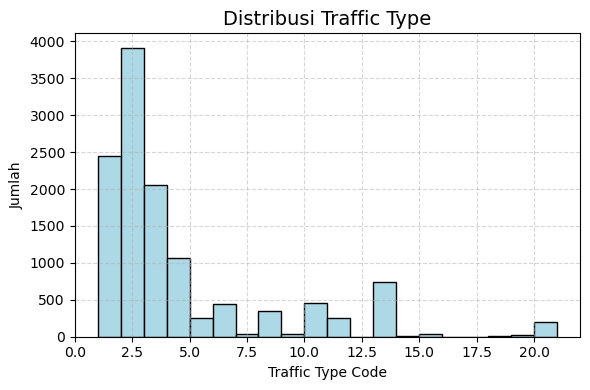

In [75]:
plt.figure(figsize=(6, 4))

plt.hist(data['TrafficType'], bins=range(1, data['TrafficType'].max() + 2), color='lightblue', edgecolor='black')

plt.title('Distribusi Traffic Type', fontsize=14)
plt.xlabel('Traffic Type Code', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Region

In [76]:
data['Region'].value_counts()

Region
1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: count, dtype: int64

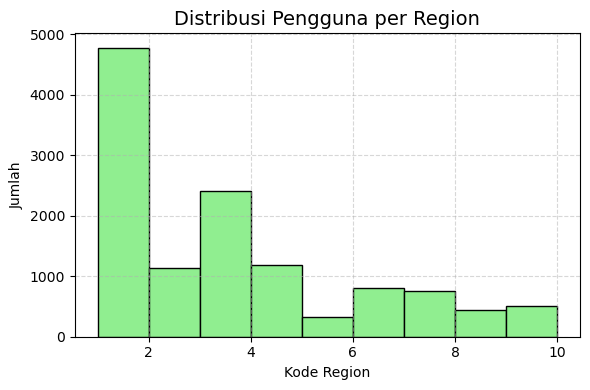

In [77]:
plt.figure(figsize=(6, 4))

plt.hist(data['Region'], bins=range(1, data['Region'].max() + 2), color='lightgreen', edgecolor='black')

plt.title('Distribusi Pengguna per Region', fontsize=14)
plt.xlabel('Kode Region', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [78]:
data['SpecialDay'].value_counts()

SpecialDay
0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: count, dtype: int64

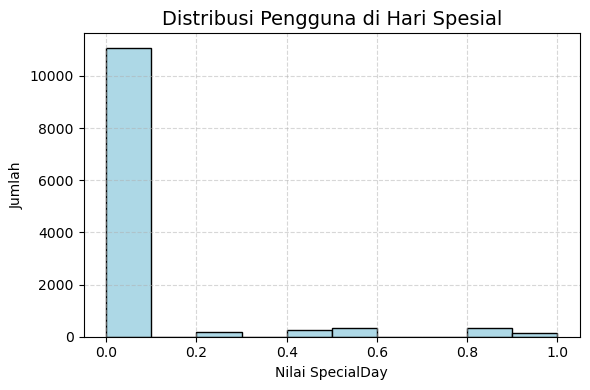

In [79]:
plt.figure(figsize=(6, 4))

plt.hist(data['SpecialDay'], bins=10, color='lightblue', edgecolor='black')

plt.title('Distribusi Pengguna di Hari Spesial', fontsize=14)
plt.xlabel('Nilai SpecialDay', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [80]:
# Handling Missing Values
imputer = SimpleImputer(strategy='most_frequent')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Ensure all data types are correct after imputation
data_imputed = data_imputed.convert_dtypes()

print("After Handling Missing Values:")
print(data_imputed.info())
print("Missing values per column:")
print(data_imputed.isnull().sum())
print("\n")

After Handling Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  Int64  
 1   Administrative_Duration  12330 non-null  Float64
 2   Informational            12330 non-null  Int64  
 3   Informational_Duration   12330 non-null  Float64
 4   ProductRelated           12330 non-null  Int64  
 5   ProductRelated_Duration  12330 non-null  Float64
 6   BounceRates              12330 non-null  Float64
 7   ExitRates                12330 non-null  Float64
 8   PageValues               12330 non-null  Float64
 9   SpecialDay               12330 non-null  Float64
 10  Month                    12330 non-null  string 
 11  OperatingSystems         12330 non-null  Int64  
 12  Browser                  12330 non-null  Int64  
 13  Region                   12330 non-null  Int6

In [81]:
# Remove Duplicate Rows
before_duplicates = data_imputed.shape[0]
data_imputed.drop_duplicates(inplace=True)
after_duplicates = data_imputed.shape[0]

print(f"After Removing Duplicates: {before_duplicates - after_duplicates} duplicate rows removed")
print(f"Number of rows after removing duplicates: {after_duplicates}")
print("\n")

After Removing Duplicates: 125 duplicate rows removed
Number of rows after removing duplicates: 12205




In [82]:
# Normalize or Standardize Features
numerical_features = data_imputed.select_dtypes(include=['number']).columns.tolist()

# Convert columns to numeric if necessary
for col in numerical_features:
    if not pd.api.types.is_numeric_dtype(data_imputed[col]):
        data_imputed[col] = pd.to_numeric(data_imputed[col], errors='coerce')

# Drop rows with NaNs introduced by coercion
data_imputed.dropna(subset=numerical_features, inplace=True)

scaler = StandardScaler()
data_imputed[numerical_features] = scaler.fit_transform(data_imputed[numerical_features])

print("After Normalization/Standardization:")
print(data_imputed[numerical_features].describe())
print("\n")

After Normalization/Standardization:
       Administrative  Administrative_Duration  Informational  \
count    1.220500e+04             1.220500e+04   1.220500e+04   
mean    -8.150429e-17            -1.397216e-17   2.794433e-17   
std      1.000041e+00             1.000041e+00   1.000041e+00   
min     -7.023024e-01            -4.600193e-01  -3.988242e-01   
25%     -7.023024e-01            -4.600193e-01  -3.988242e-01   
50%     -4.020291e-01            -4.093107e-01  -3.988242e-01   
75%      4.987907e-01             7.354819e-02  -3.988242e-01   
max      7.405076e+00             1.868953e+01   1.841638e+01   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            1.220500e+04    1.220500e+04             12205.000000   
mean            -4.191649e-17   -5.588865e-17                 0.000000   
std              1.000041e+00    1.000041e+00                 1.000041   
min             -2.462572e-01   -7.186438e-01                -0.628793   
25%    

In [83]:
# Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(data_imputed[numerical_features]))

if z_scores.shape[1] == len(numerical_features):
    threshold = 3
    initial_count = data_imputed.shape[0]
    data_imputed = data_imputed[(z_scores < threshold).all(axis=1)]
    removed = initial_count - data_imputed.shape[0]
    print(f"After Outlier Removal: {removed} rows removed based on z-score threshold {threshold}")
    print(f"Remaining rows: {data_imputed.shape[0]}\n")
else:
    print("Z-score dimensions do not match, skipping outlier detection.\n")

After Outlier Removal: 2639 rows removed based on z-score threshold 3
Remaining rows: 9566



In [84]:
# Encoding Categorical Features
categorical_features = data_imputed.select_dtypes(include=['object', 'string']).columns.tolist()

for col in categorical_features:
    le = LabelEncoder()
    try:
        data_imputed[col] = le.fit_transform(data_imputed[col].astype(str))
        print(f"Encoded column '{col}' successfully.")
    except Exception as e:
        print(f"Encoding failed on column '{col}': {e}")
print("\n")


Encoded column 'Month' successfully.
Encoded column 'VisitorType' successfully.




In [85]:
# Binning the 'Administrative_Duration' Feature
if 'Administrative_Duration' in data_imputed.columns:
    if not data_imputed['Administrative_Duration'].isnull().all():
        try:
            data_imputed['Administrative_Duration_Bin'] = pd.qcut(
                data_imputed['Administrative_Duration'],
                q=4,
                labels=False,
                duplicates='drop'  # Avoid errors due to duplicate bin edges
            )
            print("Binning on 'Administrative_Duration' done successfully.\n")
        except ValueError as e:
            print(f"Error during binning: {e}\n")
    else:
        print("'Administrative_Duration' column is empty, cannot perform binning.\n")
else:
    print("'Administrative_Duration' column not found.\n")

Binning on 'Administrative_Duration' done successfully.



In [86]:
# Final Preprocessed Dataset Summary
print('--- Dataset after Preprocessing ---')
print(data_imputed.head())
print('\n--- Dataset Info after Preprocessing ---')
print(data_imputed.info())


--- Dataset after Preprocessing ---
   Administrative  Administrative_Duration  Informational  \
1       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   
5       -0.702302                -0.460019      -0.398824   
9       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
1               -0.246257       -0.673793                -0.595451   
3               -0.246257       -0.673793                -0.627404   
4               -0.246257       -0.494387                -0.301889   
5               -0.246257       -0.292557                -0.548452   
9               -0.246257       -0.651367                -0.244322   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
1    -0.450137   1.268054   -0.318962   -0.310240      2         -0.136980   
3     0.654748   2.1

In [91]:
# Save the Preprocessed Dataset
output_path = r'C:\Users\Ega\Pictures\Dicoding\Membangun Sistem ML\Submission-Membangun-Sistem-ML\Eksperimen_SML_Baiq_Ega_Aulia\Preprocessing\Dataset\online_shoppers_intention_preprocessed.csv'

data_imputed.to_csv(output_path, index=False)
print(f"\n Preprocessed dataset successfully saved at: {output_path}")

# Show info about the saved file
file_size = os.path.getsize(output_path)  # get file size in bytes
print(f" File size: {file_size / 1024:.2f} KB")  # convert bytes to KB and print



 Preprocessed dataset successfully saved at: C:\Users\Ega\Pictures\Dicoding\Membangun Sistem ML\Submission-Membangun-Sistem-ML\Eksperimen_SML_Baiq_Ega_Aulia\Preprocessing\Dataset\online_shoppers_intention_preprocessed.csv
 File size: 2790.57 KB


In [92]:
# Reload and validate saved CSV
df_check = pd.read_csv(output_path)
print('\n--- Preview of First 5 Rows from Saved CSV ---')
print(df_check.head())

print('\n--- Info of Dataset from Saved CSV ---')
print(df_check.info())


--- Preview of First 5 Rows from Saved CSV ---
   Administrative  Administrative_Duration  Informational  \
0       -0.702302                -0.460019      -0.398824   
1       -0.702302                -0.460019      -0.398824   
2       -0.702302                -0.460019      -0.398824   
3       -0.702302                -0.460019      -0.398824   
4       -0.702302                -0.460019      -0.398824   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.246257       -0.673793                -0.595451   
1               -0.246257       -0.673793                -0.627404   
2               -0.246257       -0.494387                -0.301889   
3               -0.246257       -0.292557                -0.548452   
4               -0.246257       -0.651367                -0.244322   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0    -0.450137   1.268054   -0.318962   -0.310240      2         -0.136980   
1     0.